## Question 3


In [31]:
# Question 3

import numpy as np
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.dpi'] = 120

x = np.linspace(0.5,1,1001)

# rescaling the x-range to [-1, 1] because Chebyshev polynomials are only defined on [-1, 1]
x_rescaled = 4*x-3

y = np.log2(x)

# getting the chebyshev coefficients up to order 25
cheb_coeffs = np.polynomial.chebyshev.chebfit(x_rescaled,y,25)

print(cheb_coeffs)

[-4.56893394e-01  4.95054673e-01 -4.24689768e-02  4.85768297e-03
 -6.25084976e-04  8.57981013e-05 -1.22671891e-05  1.80404306e-06
 -2.70834250e-07  4.13047208e-08 -6.37809409e-09  9.94825145e-10
 -1.56462292e-10  2.47798460e-11 -3.94917279e-12  6.32256693e-13
 -1.03000020e-13  1.65751345e-14 -3.48042410e-15  5.78417360e-16
 -1.12041984e-15  1.73786845e-16 -5.57204660e-16  3.08796397e-16
 -5.71175232e-16  1.72741582e-16]


The Chebyshev polynomials happen to be bounded by [-1, 1], so the max error we can make by truncating a Chebyshev poly is just the sum of the cut coefficients. We want an error smaller than 1e-6, so we better make sure that the sum of the coefficients we cut off is less than 1e-6. With this in mind, I'll decide to keep up to the 8th term, which is of order 1e-6. All the coefficients that are cut are smaller than 1e-6, so there's no way we have an error greater than 1e-6. 

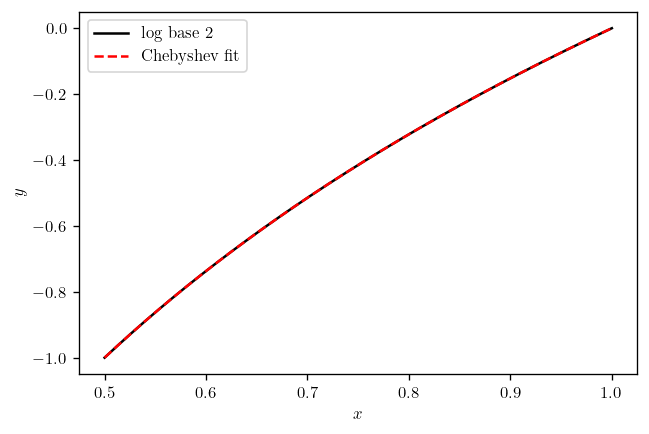

The root mean squared error is:  1.9196336825018886e-07 and the max error is, 3.196978212161028e-07
The accuracy is better than 1e-6! So good!
[-9.99999680e-01 -9.98557748e-01 -9.97117254e-01 ... -1.44323762e-03
 -7.21321338e-04  2.35047874e-07]


In [38]:
cheb_coeffs_trunc = cheb_coeffs[0:8] # keeping only the 8 first coefficients

# construct the Chebyshev polynomial fit
cheb_poly = np.polynomial.chebyshev.chebval(x_rescaled,cheb_coeffs_trunc)
error = np.abs(cheb_poly-y)
rmse = np.sqrt(np.mean(error**2))

plt.plot(x,y,'k', label = 'log base 2')
plt.plot(x, cheb_poly, 'r--',label = 'Chebyshev fit')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.show()
print('The root mean squared error is: ', rmse, 'and the max error is,', np.max(error))
print('The accuracy is better than 1e-6! So good!')
print(cheb_poly)

In [34]:
def mylog2(x):
    ''' returns the natural log of a number x'''
    frexp = np.frexp(x)

    # use our fit to take the log base 2 of the mantissa
    # log base 2 of 2**exponent is just exponent
    log2 = np.log2(frexp[0])+frexp[1]

    # do a change of basis to get natural log
    ln = log2/np.log2(np.exp(1))

    return ln


# examples for some values in [0.5, 1]
print('For x = 0.6, my routine yields', mylog2(0.6), ', the true value is', np.log(0.6))
print('For x = 0.9, my routine yields', mylog2(0.9), ', the true value is', np.log(0.9))

For x = 0.6, my routine yields -0.5108256237659907 , the true value is -0.5108256237659907
For x = 0.9, my routine yields -0.10536051565782628 , the true value is -0.10536051565782628


It works! Now let's compare our Chebyshev fit to a Legendre fit.

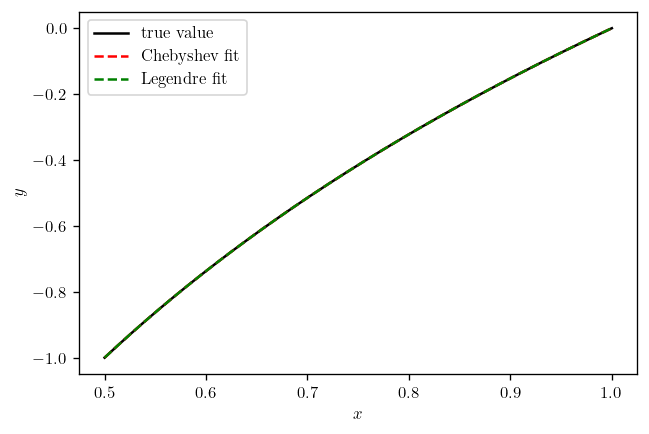

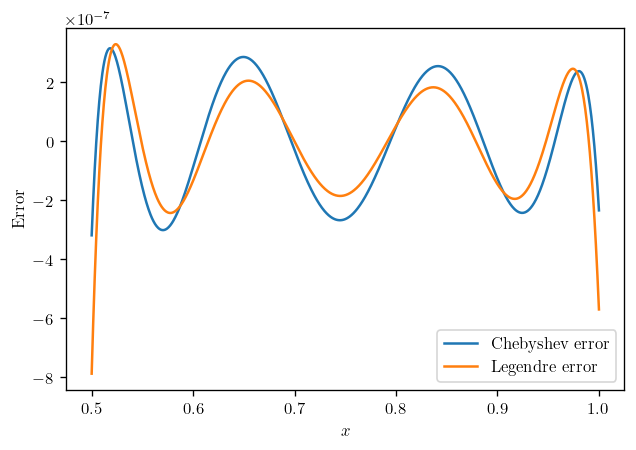

Again, for the Chebyshev fit, the root mean squared error is:  1.9196336825018886e-07 and the max error is, 3.196978212161028e-07
For the Legendre fit, the root mean squared error is:  1.685237896516845e-07 and the max error is, 7.888928763577496e-07


In [39]:
legendre_coeffs = np.polynomial.legendre.legfit(x, y, deg = 7) # legendre fit to the same order as Chebshev fit
legendre_poly = np.polynomial.legendre.legval(x,legendre_coeffs)

error_legendre = np.abs(y-legendre_poly)
rmse_legendre = np.sqrt(np.mean(error_legendre**2))

plt.plot(x,y, 'k', label = 'true value')
plt.plot(x, cheb_poly, 'r--', label = 'Chebyshev fit')
plt.plot(x, legendre_poly, 'g--', label = 'Legendre fit')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.show()

plt.plot(x,y-cheb_poly, label = 'Chebyshev error')
plt.plot(x,y-legendre_poly, label = 'Legendre error')
plt.xlabel('$x$')
plt.ylabel('Error')
plt.legend()
plt.show()

print('Again, for the Chebyshev fit, the root mean squared error is: ', rmse, 'and the max error is,', np.max(error))
print('For the Legendre fit, the root mean squared error is: ', rmse_legendre, 'and the max error is,', np.max(error_legendre))

As we can see from both the numbers just above and from the plot: the Legendre fit as a higher max error than the Chebyshev fit. The root mean squared error are similar for both fits however. Regardless, Chebyshev polynomials are awesome!